In [ ]:
import yfinance as yf
stock_data = yf.download('NVDA', start = '2014-07-01', end = '2024-07-01')
stock_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-01,0.463000,0.471500,0.461500,0.468750,0.446221,321180000
2014-07-02,0.467000,0.469000,0.464250,0.467000,0.444555,179284000
2014-07-03,0.462750,0.472500,0.462750,0.471250,0.448601,136892000
2014-07-07,0.472000,0.472250,0.466750,0.467500,0.445031,127496000
2014-07-08,0.466250,0.468250,0.459250,0.463750,0.441461,221940000
...,...,...,...,...,...,...
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))


In [ ]:

import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)



In [ ]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)



Epoch 1/10
31/31 [==============================] - 11s 182ms/step - loss: 1.2062e-04
Epoch 2/10
31/31 [==============================] - 6s 205ms/step - loss: 3.0831e-05
Epoch 3/10
31/31 [==============================] - 7s 228ms/step - loss: 2.8488e-05
Epoch 4/10
31/31 [==============================] - 4s 121ms/step - loss: 2.7753e-05
Epoch 5/10
31/31 [==============================] - 5s 170ms/step - loss: 2.2872e-05
Epoch 6/10
31/31 [==============================] - 6s 187ms/step - loss: 2.4046e-05
Epoch 7/10
31/31 [==============================] - 4s 120ms/step - loss: 2.3374e-05
Epoch 8/10
31/31 [==============================] - 6s 195ms/step - loss: 2.5703e-05
Epoch 9/10
31/31 [==============================] - 5s 150ms/step - loss: 2.3967e-05
Epoch 10/10
31/31 [==============================] - 7s 236ms/step - loss: 2.3273e-05


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)



In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)



In [ ]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)



In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()



In [ ]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]



3/3 [==============================] - 1s 27ms/step


array([ 71.77679443,  71.44084167,  70.53236389,  70.8456955 ,
        71.83979034,  73.14386749,  74.40755463,  75.34455872,
        76.15361023,  77.18327332,  78.57719421,  80.08124542,
        81.79927826,  83.91446686,  85.28742981,  85.82183075,
        86.58150482,  87.19868469,  87.25924683,  86.96925354,
        86.57891846,  86.29120636,  86.21817017,  86.41176605,
        87.10197449,  88.07380676,  88.76293945,  88.90383148,
        88.72399902,  88.37568665,  87.85308838,  87.23574829,
        86.24790955,  85.45857239,  84.76937103,  84.00730133,
        83.53453064,  83.75939941,  84.04394531,  84.06053925,
        84.11508179,  83.74305725,  83.26858521,  81.69321442,
        80.141716  ,  79.17327118,  78.31465912,  78.03738403,
        78.80213165,  80.07606506,  81.31562042,  81.94361877,
        82.50323486,  83.32203674,  84.60767365,  85.77471924,
        86.69985199,  87.13461304,  87.36652374,  87.49970245,
        87.66921997,  88.25020599,  88.93953705,  89.35

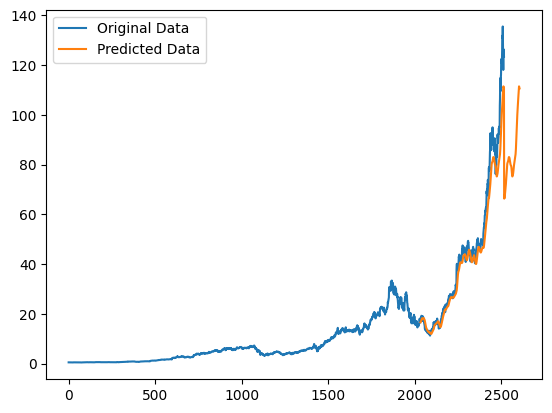

In [ ]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()